# Item-Item Recommender

In [5]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [6]:
df_ratings = pd.read_csv("../data/ratings.csv")
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
df_books = pd.read_csv("../data/books.csv")
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Exploratory Data Analysis

In [17]:
df_ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [8]:
df_books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [9]:
n_ratings = len(df_ratings)
n_books = df_ratings["book_id"].nunique()
n_users = df_ratings["user_id"].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique bookId's: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 5976479
Number of unique bookId's: 10000
Number of unique users: 53424
Average number of ratings per user: 111.87
Average number of ratings per book: 597.65


User rating counts

In [10]:
user_freq = df_ratings[['user_id', 'book_id']].groupby('user_id').count().reset_index()
user_freq.columns = ['user_id', 'n_ratings']
user_freq.head()

,user_id,n_ratings
0,1,117
1,2,65
2,3,91
3,4,134
4,5,100


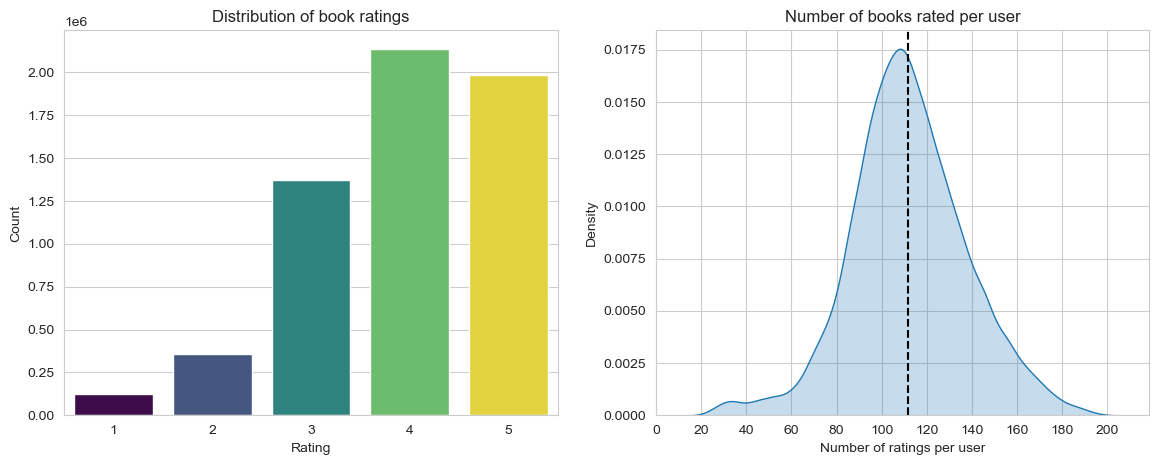

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.countplot(x="rating", hue="rating", data=df_ratings, palette="viridis", legend=False)
plt.title("Distribution of book ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], fill=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("Number of ratings per user")
plt.ylabel("Density")
plt.title("Number of books rated per user")

# X-Achse in sinnvolle Intervalle bringen (z.B. in Zehnerschritten)
ax.set_xticks(range(0, 201, 20))
plt.show()

The most common rating is 4, while ratings such as 1 and 2 are much more rare. The number of books rated per user is similar to a normal distribution.

### Which book has the lowest and highest average rating?

In [20]:
mean_rating = df_ratings.groupby('book_id')[['rating']].mean()

lowest_rated = mean_rating['rating'].idxmin()
df_books.loc[df_books['book_id'] == lowest_rated]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1792,1793,105578,105578,101770,25,345498321,9.780345e+12,Chetan Bhagat,2005.0,One Night @ The Call Center,...,40718,44833,1244,10559,14125,11872,5177,3100,https://images.gr-assets.com/books/1320500924m...,https://images.gr-assets.com/books/1320500924s...


One Night @ The Call Center is the worst rated book.

In [21]:
highest_rated = mean_rating['rating'].idxmax()
df_books.loc[df_books['book_id'] == highest_rated]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...


The Complete Calvin and Hobbes is the best rated book.